In [5]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import uniform
from matplotlib.lines import Line2D

### Eugeniu Vezeteu - 886240

a)

M  7882
Ratio  0.7882


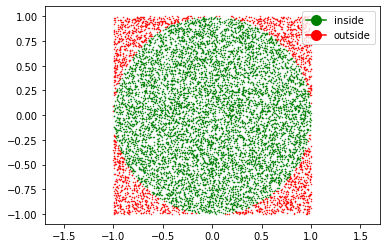

Estimated pi:3.1528 with N:10000 points
Error:-0.011207346410206931


In [7]:
N = 10000
R = 1
points = uniform(-R, R, (N, 2))              #points in the square
dist_matrix = np.linalg.norm(points, axis=1) #distance matrix
inside_circle = dist_matrix <= R             #get only points inside circle


M = np.count_nonzero(inside_circle)
print('M ',M)
ratio = M/N
print('Ratio ',ratio)
pi = ratio*4

plt.scatter(points[inside_circle,0], points[inside_circle,1], marker='.', edgecolor='g', s=1)
plt.scatter(points[~inside_circle,0], points[~inside_circle,1], marker='.', edgecolor='r', s=1)
plt.axis('equal')
legend_elements = [Line2D([0], [0], marker='o', color='g', label='inside',
                          markerfacecolor='g', markersize=10),
                   Line2D([0], [0], marker='o', color='r', label='outside',
                          markerfacecolor='r', markersize=10)]
plt.legend(handles=legend_elements)
plt.show()

print('Estimated pi:{} with N:{} points'.format(pi,N))
print('Error:{}'.format(np.pi-pi))


b)

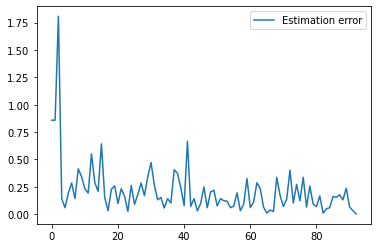

Average required N is  46


In [42]:
def Estimate_pi():
    N = 1
    err_history = []
    while True:
        samples = uniform(-R, R, (N, 2))
        dist_matrix = np.linalg.norm(samples, axis=1)
        inside_circle = dist_matrix <= R

        inside = np.count_nonzero(inside_circle)
        pi = 4*(inside / N)

        err_history.append(abs(np.pi-pi))
        if abs(np.pi-pi)<0.009: #stop when first 2 decimals are correct
            break

        N+=1
    return err_history, N

err_history,N = Estimate_pi()
plt.plot(err_history, label = 'Estimation error')
plt.legend()
plt.show()

avg_N = []
for i in range(5000): #Average over 5000 times
    err_history,N = Estimate_pi()
    avg_N.append(N)
    
print('Average required N is ', round(np.average(avg_N)))